In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import gamma, gammainc, gammaincc
from scipy.stats import invgamma

In [7]:
data = np.loadtxt("../testout.csv", delimiter=";")
print(data)
print(data.mean())

[ 324.87296751 1024.86589751  693.33143067 ...  325.33296747  277.0464723
  123.35998766]
460.0392325761676


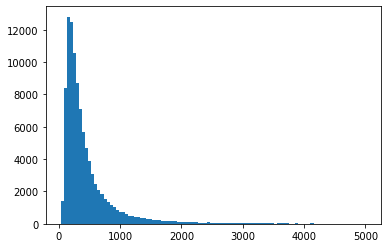

In [8]:
plt.hist(data, bins=100)#, range=(0,10))
plt.show()

In [ ]:
x = np.linspace(invgamma.ppf(0.01, 1), invgamma.ppf(0.9, 1), 1000)
plt.plot(x, invgamma.pdf(x,1))

plt.show()

In [ ]:
plt.scatter(x, data, s=0.01)
plt.show()

In [ ]:
def taxiDistDistributionNormalized(x, m, k, x0=None, x1=None):
    z = x/m
    def unnormalized(x, m, k):
        return np.exp(-1/z)*z**(-k)
        
    if x0 and x1:
        norm = quad(lambda x: unnormalized(x, m, k), x0, x1)
        return unnormalized(x, m, k)/norm
    else:
        return unnormalized(x, m, k)

In [ ]:
m_ = 2000
m = m_*gammaincc(3-2, m_/10000)*gamma(1)
x = np.linspace(0.001, 10000, len(data))
y = taxiDistDistributionNormalized(x, m, 3)
norm = quad(lambda x: taxiDistDistributionNormalized(x,m,3),0.001,10000)[0]
print("average: ", quad(lambda x: x*taxiDistDistributionNormalized(x, m, 3)/norm, 0.001, 10000))
plt.plot(x, y)

plt.show()

In [ ]:
plt.plot(data[:,0], data[:,1])
plt.plot(data[:,0], data[:,2])
# plt.plot(data[:,0], 1/3*data[:,0]**3, ls='--')

plt.show()